# Training Stripes

In [3]:
import h5py, math, os, random
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
save_dir = "/home/brian/data4/brian/PBnJ/test_data/circles_padded"
size = (1080, 1080, 1)
label_size = (30, 3)

intensity_scale = 100 
intensity_offset = 1300 
x_scale = 10
y_scale = 100

X,Y = np.mgrid[100:1000:200, 100:1000:200]

X = X.flatten()
Y = Y.flatten()


def pattern_gen_stripes(x,y,z):
    x = x/x_scale
    y = y/y_scale
    return (math.sin(x) - y + z) * intensity_scale + intensity_offset


# spots = np.random()
def pattern_gen(x,y,z):
    arc = x^2 + y^2

    return -math.sqrt((x - arc) ** 2 + (y - arc) ** 2) * intensity_scale + intensity_offset


def transform(x,y,z):
    # return x + 1, y, z
    return x - x/5, y + y/20, z
    # return x + .1 * y, y, z

170.51184248764895 0.0


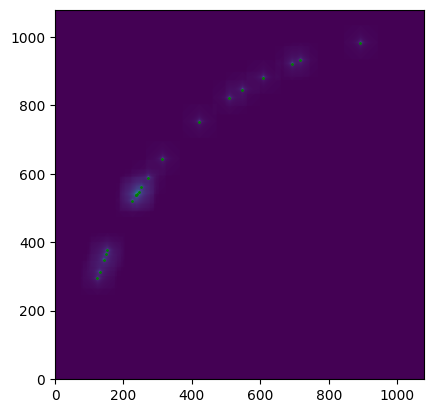

In [ ]:
dot_max = 50

rois = np.zeros(size)
rois = np.zeros(size)

%matplotlib inline
img_fix = np.zeros(size)
fix_labs = []
for i in range(20):
    a = random.uniform(1.7, 3.)
    xc = int(1000 * math.cos(a)) + 1079
    yc = int(1000 * math.sin(a))
    # print(a, xc, yc)
    fix_labs.append((xc,yc))
    s = random.random()
    for x in range(-dot_max, dot_max):
        for y in range(-dot_max, dot_max):
            for z in range(size[2]):
                img_fix[yc - y, xc - x, z] = img_fix[yc - y, xc - x, z] + 100/(abs(x) + abs(y) + 1)
    
X = [x for x,y in fix_labs]
Y = [y for x,y in fix_labs]

    
# plt.invert_yaxis()
fig, ax = plt.subplots()
ax.imshow(img_fix)

print(np.max(img_fix),np.min(img_fix))

ax.invert_yaxis()
ax.scatter(X, Y, s=1, c='g')
plt.show()

170.51184248764895 0.0


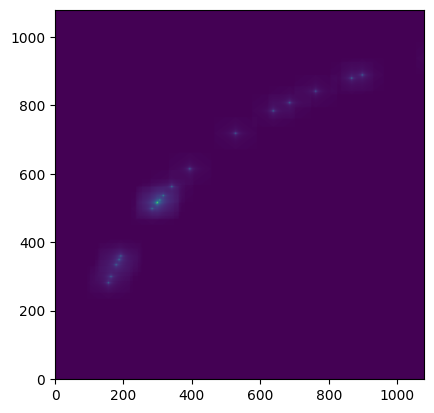

In [85]:
img_mov = np.zeros(size)
for y in range(size[0]):
    for x in range(size[1]):
        for z in range(size[2]):
            xt,yt,zt = transform(x,y,z)
            xt = min(max(int(xt), 0), 1079)
            yt = min(max(int(yt), 0), 1079)
            zt = min(max(int(zt), 0), 0)
            img_mov[y,x,z] = img_fix[yt,xt,zt]

Xt = []
Yt = []
for x, y in zip(X, Y):
    x, y, z = transform(x, y, z)
    Xt.append(x)
    Yt.append(y)


print(np.max(img_mov),np.min(img_mov))

fig, ax = plt.subplots()
ax.imshow(img_mov)


ax.invert_yaxis()
# ax.scatter(Xt, Yt, s=1, c='g')
plt.show()

In [86]:
with h5py.File(os.path.join(save_dir, "fixed_images.h5"), 'w') as ifix, h5py.File(os.path.join(save_dir, "fixed_labels.h5"), 'w') as lf:
    ifix.create_dataset("1to2", data = img_fix)
    lf.create_dataset("1to2", data = np.pad(np.column_stack((X, Y, np.zeros_like(X))), [[0, label_size[0] - len(X)],[0, 0]], "constant", constant_values=-1))


with h5py.File(os.path.join(save_dir, "moving_images.h5"), 'w') as im, h5py.File(os.path.join(save_dir, "moving_labels.h5"), 'w') as lm:
    im.create_dataset("1to2", data = img_mov)
    lm.create_dataset("1to2", data = np.pad(np.column_stack((Xt, Yt, np.zeros_like(Xt))), [[0, label_size[0] - len(Xt)],[0, 0]], "constant", constant_values=-1))


with h5py.File(os.path.join(save_dir, "moving_rois.h5"), 'w') as mr, h5py.File(os.path.join(save_dir, "fixed_rois.h5"), 'w') as fr:
    fr.create_dataset("1to2", data = np.zeros_like(img_mov))
    mr.create_dataset("1to2", data = np.zeros_like(img_mov))

Same as above but pads the image with zeros

In [89]:
padding = np.array([[0,0],[0,0],[1,0]])

labs = np.column_stack((X, Y, np.zeros_like(X))) + padding[:, 0]
labsT = np.column_stack((Xt, Yt, np.zeros_like(Xt))) + padding[:, 0]

with h5py.File(os.path.join(save_dir, "fixed_images.h5"), 'w') as ifix, h5py.File(os.path.join(save_dir, "fixed_labels.h5"), 'w') as lf:
    ifix.create_dataset("1to2", data = np.pad(img_fix, padding, "constant", constant_values=0))
    lf.create_dataset("1to2", data = np.pad(labs, [[0, label_size[0] - len(X)],[0, 0]], "constant", constant_values=-1))


with h5py.File(os.path.join(save_dir, "moving_images.h5"), 'w') as im, h5py.File(os.path.join(save_dir, "moving_labels.h5"), 'w') as lm:
    im.create_dataset("1to2", data = np.pad(img_mov, padding, "constant", constant_values=0))
    lm.create_dataset("1to2", data = np.pad(labsT, [[0, label_size[0] - len(Xt)],[0, 0]], "constant", constant_values=-1))

with h5py.File(os.path.join(save_dir, "moving_rois.h5"), 'w') as mr, h5py.File(os.path.join(save_dir, "fixed_rois.h5"), 'w') as fr:
    fr.create_dataset("1to2", data = np.pad(np.zeros_like(img_mov), padding, "constant", constant_values=0))
    mr.create_dataset("1to2", data = np.pad(np.zeros_like(img_mov), padding, "constant", constant_values=0))
